In [1]:
import pylab as plt
import numpy as np
from scipy.integrate import odeint
import pandas as pd

In [2]:
data = pd.read_csv('HATS_global_F11.dat', sep=r"\s*", parse_dates=[['HATS_F11_YYYY', 'HATS_F11_MM']])
data.index=data['HATS_F11_YYYY_HATS_F11_MM']

/Users/ptg21/anaconda/envs/basemap/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
bank=plt.loadtxt('/Users/ptg21/Desktop/montzka.dat')

In [4]:
bank

array([ 103.9,   92. ,   89. ,   75.8,   81.7,   69.5,   67.3,   67.7,
         54.4,   56.5,   56.9,   54.4,   50.8,   51.6,   54.9,   57.4,
         51.1,   53.2,   50.9,   58.7,   68.9,   64.8,   68. ])

In [38]:

def CFCModel(y, t):
    bank = np.array([0.,1.])
    bank=plt.loadtxt('/Users/ptg21/Desktop/montzka.dat')
    #bank = np.zeros_like(bank)
    Ggperyearinpptv = 1e6/5e18 *(28.8/RMMCFC11) *1e12/ yr 
    bank = bank*Ggperyearinpptv
    # add an extra source term between tstart and tend
    if t>0*yr and t<1*yr:
        dy0 = bank[0] - k1*y[0]
    elif t>1*yr and t<2*yr:
        dy0 = bank[1] - k1*y[0]
    elif t>2*yr and t<3*yr:
        dy0 = bank[2] - k1*y[0]
    elif t>3*yr and t<4*yr:
        dy0 = bank[3] - k1*y[0]
    elif t>4*yr and t<5*yr:
        dy0 = bank[4] - k1*y[0]
    elif t>5*yr and t<6*yr:
        dy0 = bank[5] - k1*y[0]
    elif t>6*yr and t<7*yr:
        dy0 = bank[6] - k1*y[0]
    elif t>7*yr and t<8*yr:
        dy0 = bank[7] - k1*y[0]
    elif t>8*yr and t<8*yr:
        dy0 = bank[8] - k1*y[0]
    elif t>9*yr and t<10*yr:
        dy0 = bank[9] - k1*y[0]
    elif t>10*yr and t<11*yr:
        dy0 = bank[10] - k1*y[0]
    elif t>11*yr and t<12*yr:
        dy0 = bank[11] - k1*y[0]
    elif t>12*yr and t<13*yr:
        dy0 = bank[12] - k1*y[0]
    elif t>13*yr and t<14*yr:
        dy0 = bank[13] - k1*y[0]
    elif t>14*yr and t<15*yr:
        dy0 = 1.1*bank[14] - k1*y[0]
    elif t>15*yr and t<16*yr:
        dy0 = 1.2*bank[15] - k1*y[0]
    elif t>16*yr and t<17*yr:
        dy0 = 1.25*bank[16] - k1*y[0]        
    else:
        dy0 = 1.30*bank[17]- k1*y[0] 
    return dy0

In [39]:
nyrs = 30.

# FIX ME!!
RMMCFC11=137.37 # g per mol
yr=365.*24.*3600.
k1 = 1./(55.*yr)

# conversion factors
Ggperyearinpptv = 1e6/5e18 *(28.8/RMMCFC11) *1e12/ yr #  Gg per year -> molecules per second

# time array for solution 
time = np.linspace(start=0.0, stop=nyrs*yr, num=nyrs)

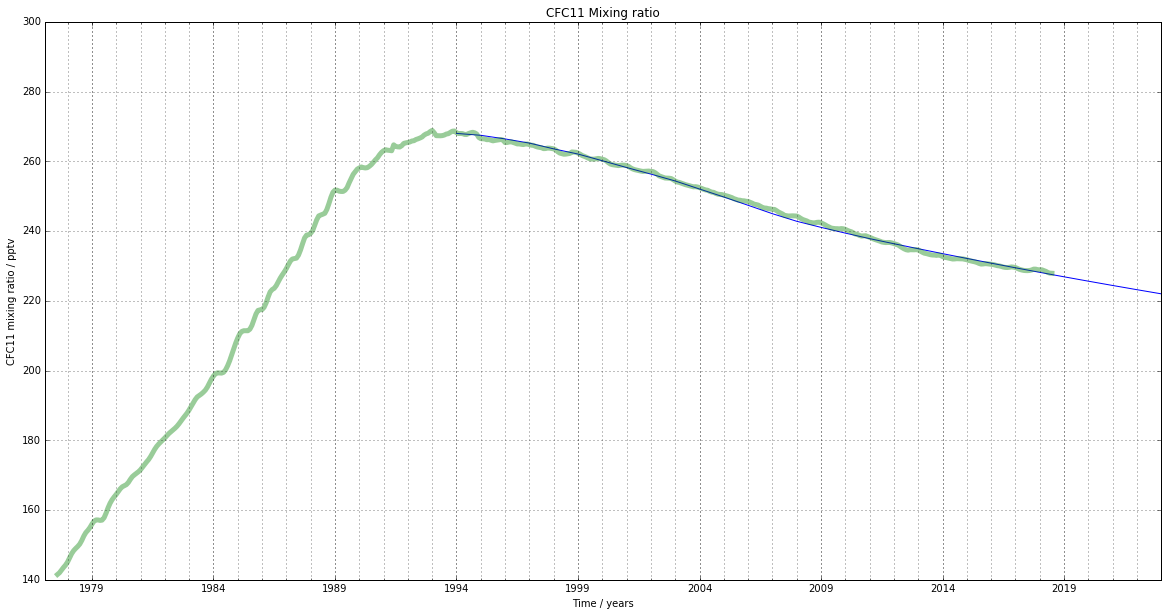

In [40]:
# case with bank emission and dead lobsters
init = 268. # pptv
bank =  60.* Ggperyearinpptv # 52 Gg per year -> pptv per sec
extra = 20.* Ggperyearinpptv
yinit = np.array([init])
y2 =  odeint(CFCModel, yinit,  time)

# create timeseries for plotting with correct date time indices
times = pd.date_range(start='1/1/1994', periods=nyrs, freq='A')
y2ts=pd.Series(data=y2[:,0], index=times)

# plot the data
fig, ax = plt.subplots(figsize=(20, 10))
y2ts.plot(ax=ax)
data['HATS_Global_F11'].plot(lw=5, alpha=0.4, ax=ax)
ax.set_title('CFC11 Mixing ratio')
ax.set_ylabel('CFC11 mixing ratio / pptv')
ax.set_xlabel('Time / years')
ax.set_ylim([140,300])
plt.grid(which='both')
plt.show()